Tokenize text to a new output:

In [1]:
from collections import defaultdict

def change_rare_words(input_corp, output_corp, threshold = 5):
    wordCounter = defaultdict(int)

    with open(input_corp , 'r' , encoding = 'ISO-8859-1') as input_file:
        for line in input_file:
            for word in line.split():
                wordCounter[word] += 1
    
    with open(input_corp, 'r' , encoding = 'ISO-8859-1') as input_file:
        with open(output_corp , 'w') as output_file: 
            for line in input_file:
                wordInLine = line.split()
                for word in wordInLine:                    
                    if wordCounter[word] < threshold:
                        output_file.write('__RARE__' + ' ')
                    else: 
                        output_file.write(word + ' ')
                output_file.write('\n')

Creates a dictionary from text (lowercase, numbers removed):

In [2]:
from collections import Counter
import string
import re
import gzip

LIMIT_OF_ROWS = 10000000

def create_dictionary(corp_source, coding='utf-8' , write_to_file = False ,words_output = None):
    #pattern = re.compile('/^[0-9]+(\\.[0-9]+)?$')
    wordCounter = Counter()
    limiter = 0
    
    print('Started creating dictionary.' + str(write_to_file) + ' ' + words_output)
    with open(corp_source , 'r', encoding = coding, errors='ignore') as input_file:
        for line in input_file:
            limiter += 1
            if limiter > LIMIT_OF_ROWS:
                break;
            for word in line.split():
                word = word.lower()
                for p in string.punctuation:
                    word = word.replace(p,"")
                word = re.sub('[\d]+','_NUM_',word)
                if word != '':
                    wordCounter[word] += 1
    
    if write_to_file is True:
        print('writing started.')
        with open(words_output , 'w', encoding = coding) as wordsoutput:
            for item in wordCounter.most_common():
                wordsoutput.write("{0} \t {1} \n".format(item[0] , item[1]))
    
    return wordCounter

In [3]:
#NOT MINE
def create_clean_counter_from_dict(input_dict_path, encoding = None):
    counter = Counter()
    iter = 0
    with open(input_dict_path,'r',encoding=encoding, errors="ignore") as f:
        for line in f:      
            ##if iter > 5:
                #break
            
            if len(line.split()) > 0:
                text = line.split()[0]
                text = text.lower()
                text = re.sub('['+string.punctuation+']', '', text)
                text = re.sub('['+string.digits+']+[.,]?['+string.digits+']*', '_NUM_', text)
            
            if text != "" and len(line.split()) > 1 and line.split()[1].isdigit():
                counter[text] += int(line.split()[1])
                
            #print(line)
            iter += 1
    
    return counter

Creates counter object from existing dictionary file:

In [53]:
from collections import Counter
import string


def create_counter_from_file(filename, coding = 'utf-8'):
    word_counter = Counter()
    with open(filename, 'r', encoding = coding, errors = 'ignore') as input_file:
        i = 0
        for line in input_file:
            words = line.split()
            if len(words) > 1:
                if (words[1].isdigit()):
                    word_counter[words[0]] = int(words[1])
    return word_counter

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import matplotlib.patches as mpatches


def count_coverage(sample_dict, corp_dict):
    results = Counter()
    good = 0
    sum = 0
    target_size = 0
    start_size = 0
    for word in corp_dict.values():
        target_size += word
    for word in sample_dict.values():
        start_size += word
    
    limits = [10,100,1000,5000,10000,25000,50000,100000,250000,500000,1000000]
    limit_index = 0
    current = 0
    for word in sample_dict.most_common():
        if word[0] in corp_dict.keys():
            good += corp_dict[word[0]]
        current += 1
        if current >= limits[limit_index]:
            limit_index += 1
            #print('Current: ' + str(current) + ', words counted good: ' + str(good) + ' / ' + str(target_size) + ' , limit_index: ' + str(limit_index))
            results[current] = (good / target_size)*100
            if limit_index == 10:
                break;
            if current > target_size:
                break;
            if current > start_size:
                break;
    while(limit_index < 11):
        results[limits[limit_index]] = (good / target_size) * 100
        limit_index += 1
    #print('Current: ' + str(current) + ', words counted good: ' + str(good) + ' / ' + str(target_size) + ' , limit_index: ' + str(limit_index))
    #results[current] = (good / target_size)*100
    
    copied_res = copy.deepcopy(results)
    return copied_res
    
'''
word_counter = create_dictionary('europarl-v7.sk-en.sk', 'utf-8' , True, 'sk_dict_1.txt')
print('Done with first.')
print(word_counter.most_common(30))
          
word_counter2 = create_dictionary('slovak.tok' , 'utf-8', True, 'sk_dict_2.txt')
print('Done with second.')
print(word_counter2.most_common(30))
'''

#hungarian_counter = create_dictionary('europarl-v7.hu-en.hu' , 'utf-8', True, 'hun_dict_1.txt')


"\nword_counter = create_dictionary('europarl-v7.sk-en.sk', 'utf-8' , True, 'sk_dict_1.txt')\nprint('Done with first.')\nprint(word_counter.most_common(30))\n          \nword_counter2 = create_dictionary('slovak.tok' , 'utf-8', True, 'sk_dict_2.txt')\nprint('Done with second.')\nprint(word_counter2.most_common(30))\n"

In [105]:
from matplotlib.pyplot import figure

def print_bar(counter, counter_rev, text1, text2):
    index = np.arange(len(counter.values()))
    
    labels = sorted(counter.keys())
    values = sorted(counter.values())
    indexes = np.arange(len(labels))
    width = 0.3
    plt.figure(figsize=(16,7))
    plt.bar(indexes,values,width, color='red' , label=text1)
    

    
    labels2 = sorted(counter_rev.keys())
    values2 = sorted(counter_rev.values())
    indexes2 = np.arange(len(labels2))
    plt.bar(indexes2 + 0.5, values2, width, color = 'blue', label=text2)
    plt.xticks(indexes + width * 0.3, labels , fontsize=6)
    
    plt.xlabel('Size of dictionary')
    plt.ylabel('Coverage')
    
    patch = mpatches.Patch('#ff0000', '#0000ff')
    
    fir_patch = mpatches.Patch(color='red', label=text1)
    sec_patch = mpatches.Patch(color='blue', label=text2)
    
    plt.legend(loc="upper left")
    
    ax = plt.subplot()
    for i in range(len(labels)):
        ax.text(index[i], counter[labels[i]] + 0.01, str(round(counter[labels[i]],4)), color='black', fontsize=8)
        ax.text(index[i] + width, counter_rev[labels[i]] + 0.01, str(round(counter_rev[labels[i]],4)), color='black', fontsize=8)
        
    plt.show()
    

In [10]:
'''word_counter3 = create_dictionary('europarl-v6.cs-en.cs', 'utf-8' , True, 'cs_dict_1.txt')
print('Done with first.')
print(word_counter3.most_common(30))
          
word_counter4 = create_dictionary('czech.tok' , 'utf-8', True, 'cs_dict_2.txt')
print('Done with second.')
print(word_counter4.most_common(30))'''

"word_counter3 = create_dictionary('europarl-v6.cs-en.cs', 'utf-8' , True, 'cs_dict_1.txt')\nprint('Done with first.')\nprint(word_counter3.most_common(30))\n          \nword_counter4 = create_dictionary('czech.tok' , 'utf-8', True, 'cs_dict_2.txt')\nprint('Done with second.')\nprint(word_counter4.most_common(30))"

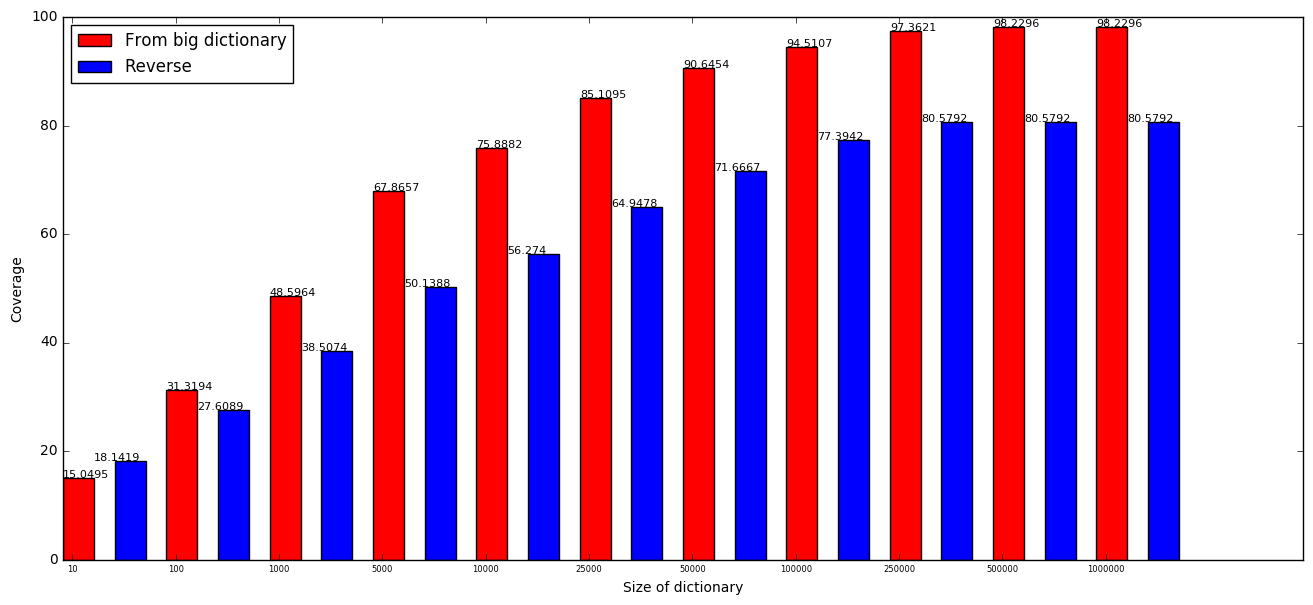

In [107]:
sk_counter = create_counter_from_file('sk_dict_1.txt')
sk_counter2 = create_counter_from_file('sk_dict_2.txt')
result = count_coverage(sk_counter2,sk_counter )
result_rev = count_coverage(sk_counter, sk_counter2)
print_bar(result, result_rev, 'From big dictionary','Reverse')

Counter({1000000: 82.21353606717892, 250000: 82.21353606717892, 500000: 82.21353606717892, 100000: 79.72136250375617, 50000: 74.36283963222216, 25000: 67.8037058015838, 10000: 58.933308495339574, 5000: 52.810281895715086, 1000: 40.147422381440926, 100: 27.81403035165467, 10: 17.839496452318844})




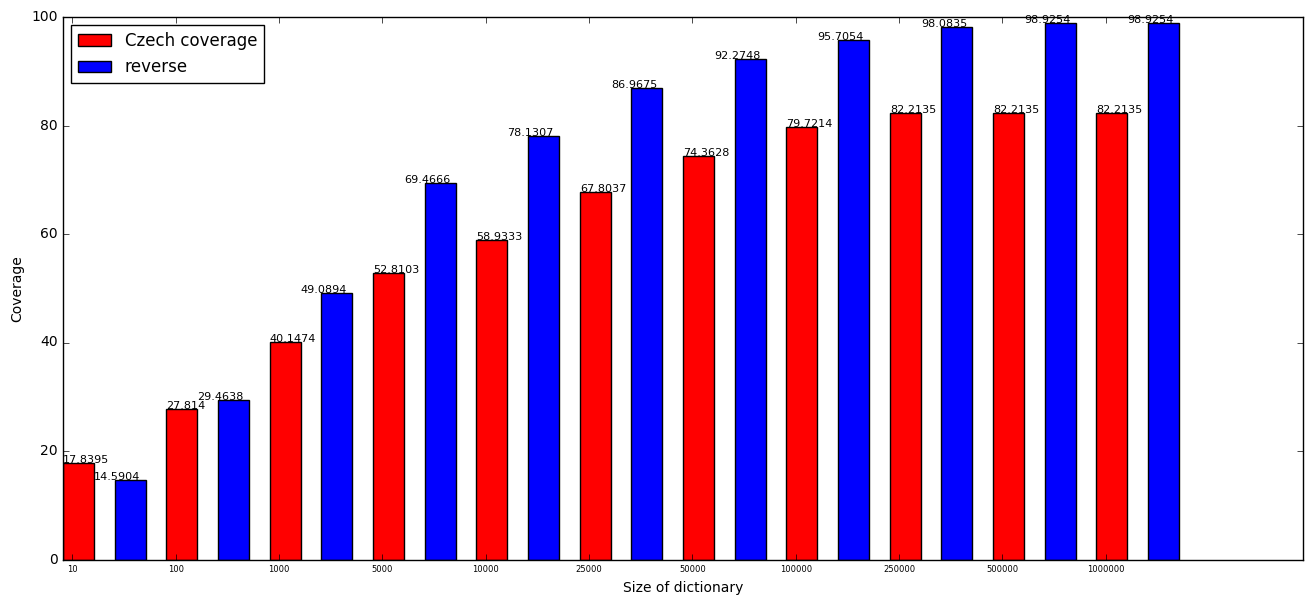

In [108]:
czech_counter = create_counter_from_file('cs_dict_1.txt')
#print(word_counter.most_common(3))
czech_counter2 = create_counter_from_file('cs_dict_2.txt')
#print(word_counter2.most_common(3))
result = count_coverage(czech_counter,czech_counter2 )
result_rev = count_coverage(czech_counter2, czech_counter)

print(result)
print('\n')

print_bar(result,result_rev, 'Czech coverage' , 'reverse')

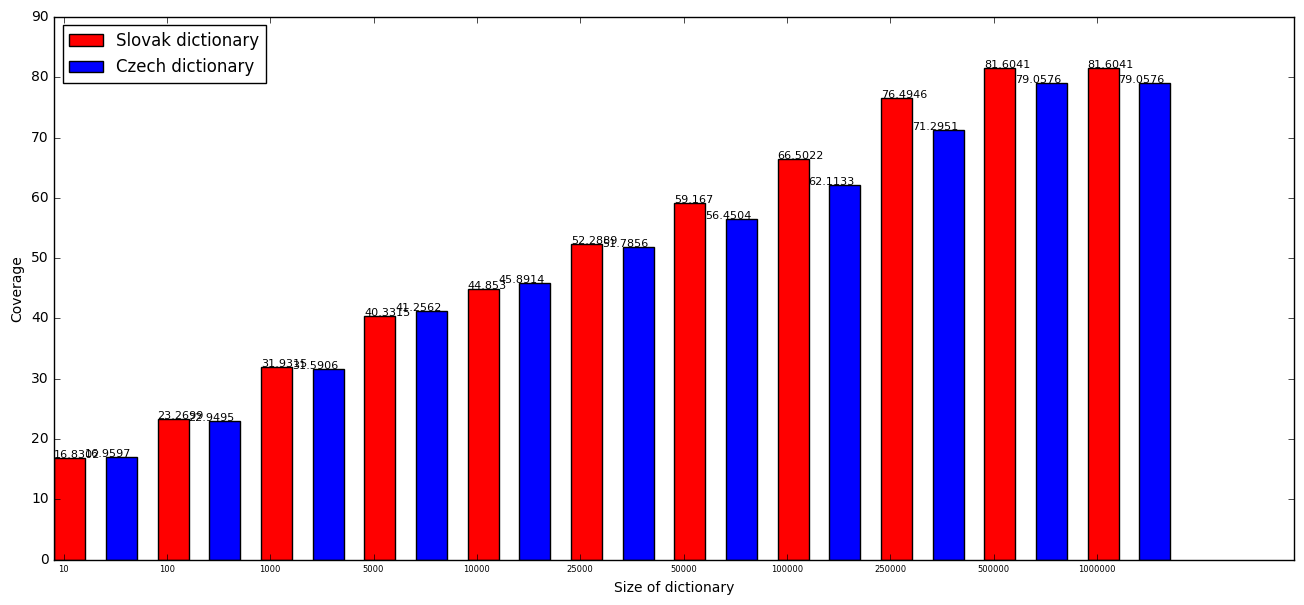

In [109]:
result = count_coverage(sk_counter2,czech_counter2 )
result_rev = count_coverage(czech_counter2, sk_counter2)

print_bar(result,result_rev, 'Slovak dictionary' , 'Czech dictionary')

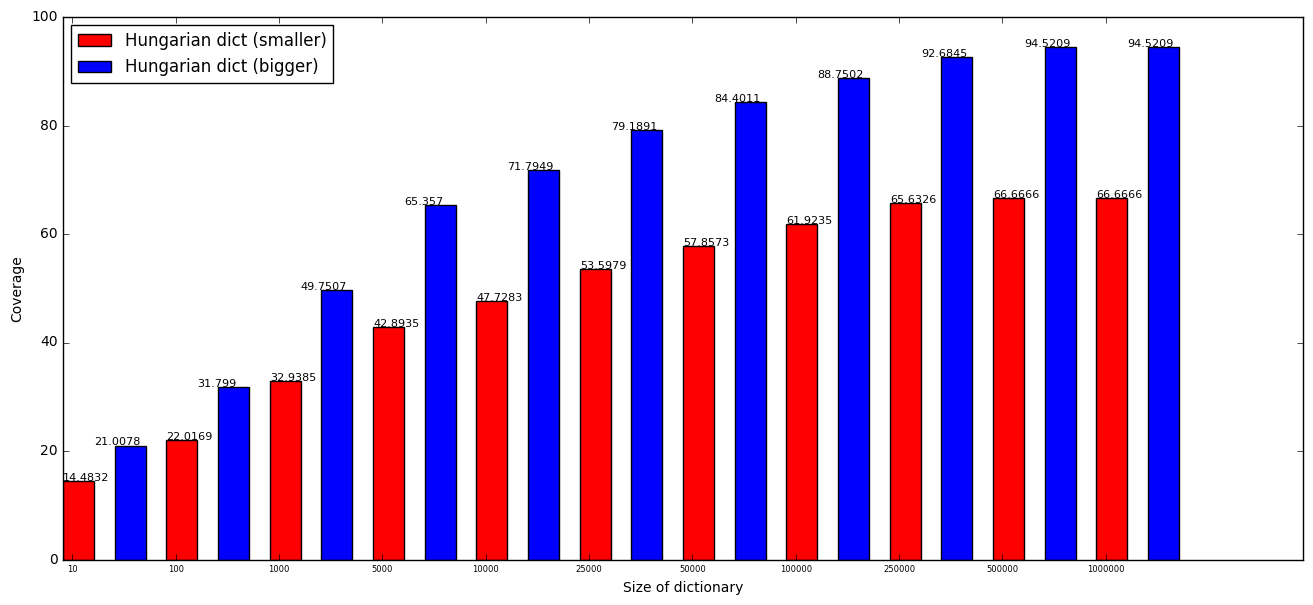

In [110]:
hungarian_counter = create_counter_from_file('hun_dict_1.txt')
hungarian_counter2 = create_counter_from_file('web2.2-freq-sorted.txt', 'latin2')

result = count_coverage(hungarian_counter , hungarian_counter2)
result_rev = count_coverage(hungarian_counter2 , hungarian_counter)

print_bar(result, result_rev, 'Hungarian dict (smaller)' , 'Hungarian dict (bigger)')